<center>
<img src='images/logo.jpg' width='300px'>
<h2> Chương 4: PHÂN VÙNG ẢNH (Image Segmentation)</h2>
</center>

---
* Mã sinh viên: 1921050540
* Họ tên sinh viên: Phạm Văn Thanh
* Lớp: DCCTKH64B
---

* Phân vùng ảnh (image segmentation) là một kỹ thuật quan trọng trong thị giác máy tính. Đây là tiền đề của của quá trình xử lý dữ liệu hình ảnh.
* Phân vùng ảnh là một bước quan trọng trong nhiều lĩnh vực khác nhau như lĩnh vực hình ảnh y tế (medical imaging), phát hiện và nhận dạng đối tượng, hệ thống camera giám sát, hệ thống điều khiển giao thông… 
* Kết quả phân vùng tốt sẽ tạo điều kiện thuận lợi cho các khâu xử lý về sau, đảm bảo tính hiệu quả cao, gia tăng mức độ chính xác, đồng thời giảm thiểu nguồn lực tính toán.

<img src='images/pic1.png' width='500px'>

**Nội dung bài học:**
1. Bài toán phân vùng ảnh
2. Ứng dụng của phần vùng ảnh
3. Các phương pháp phân vùng ảnh
    1. Phân vùng ảnh dựa trên ngưỡng
    2. Phân vùng ảnh dựa trên cạnh
    3. Phân vùng ảnh dựa trên kỹ thuật phân cụm

---
**1. Phân vùng ảnh là gì?**

* Phân vùng ảnh là một phương pháp mà trong đó, hình ảnh kỹ thuật số được chia thành nhiều nhóm con khác nhau được gọi là segments.

* Một cách dễ hiểu, phân vùng ảnh là một quá trình gán nhãn (assigning a lablel) cho mỗi điểm ảnh trong một bức ảnh, các điểm ảnh trong cùng một nhãn sẽ có những đặc tính giống nhau về màu sắc, cường độ hoặc kết cấu của ảnh

**Các cách tiếp cận phân vùng ảnh:**
1. Cách tiếp cận tương đồng (Similarity approach), có nghĩa là phát hiện sự tương đồng giữa các pixel hình ảnh để tạo thành một phân đoạn, dựa trên một ngưỡng. Các thuật toán học máy như phân cụm thường dựa trên kiểu tiếp cận này để phân vùng một hình ảnh.
2. Cách tiếp cận gián đoạn (Discontinuity approach): Cách tiếp cận này dựa trên sự gián đoạn của các giá trị cường độ pixel trong hình ảnh. Các kỹ thuật phát hiện đường, điểm và cạnh sử dụng kiểu tiếp cận gián đoạn để thu được các kết quả phân vùng trung gian. Kết quả này sau đó có thể được xử lý để cho ra hình ảnh được phân vùng cuối cùng.

---
*Copyright @dangvannam.FIT.HUMG*

In [1]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

Version OpenCV: 4.6.0


## THỰC HÀNH 4.1
---

1. Đọc và hiển thị ảnh Thuchanh4_1.jpeg ở dạng ảnh xám
2. Phân vùng ảnh sử dụng phương pháp phân ngưỡng toàn cục (Hãy xác định ngưỡng phù hợp để đạt kết quả tốt nhất)
3. Phân vùng ảnh sử dụng phương pháp phân ngưỡng thích nghi (Hãy xác định các tham số phù hợp để đạt kết quả tốt nhất)

<img src='images/Thuchanh4_1.jpeg' width='300px'>

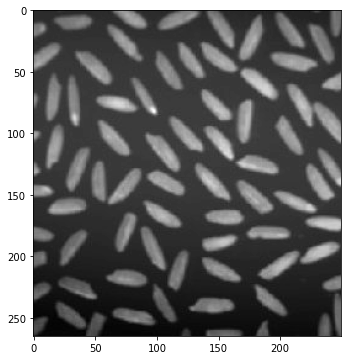

In [2]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
#Đọc ảnh ở chế độ ảnh xám:
img_41 = cv2.imread('images/Thuchanh4_1.jpeg',0)

#Hiển thị ảnh gốc:
plt.figure(figsize=(8,6))
plt.imshow(img_41,cmap='gray')
plt.show()



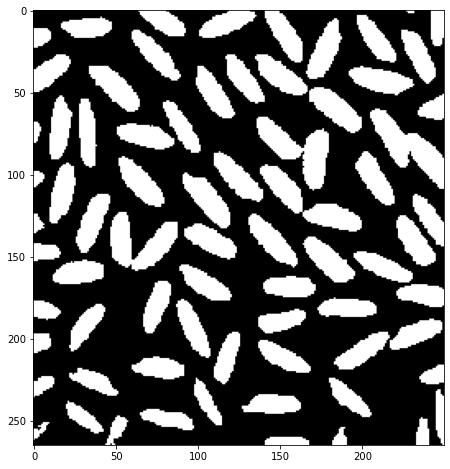

In [3]:
#Phân ngưỡng toàn cục:
(T, thresh) = cv2.threshold(img_41, 90, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,8))
plt.imshow(thresh,cmap='gray')
plt.show()

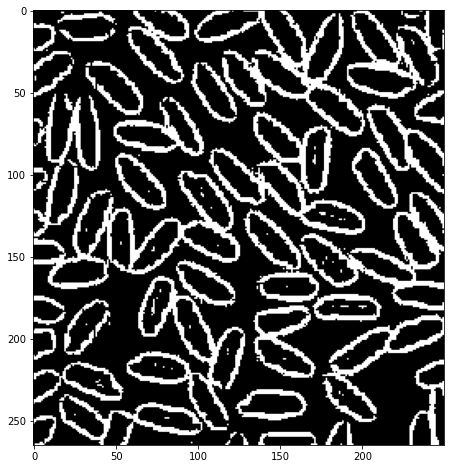

In [4]:
#phân ngưỡng thích nghi:
pic_1 = cv2.adaptiveThreshold(img_41,
                            255,
                            cv2.ADAPTIVE_THRESH_MEAN_C,  
                            cv2.THRESH_BINARY_INV,
                            7,
                            6)
plt.figure(figsize=(10,8))
plt.imshow(pic_1,cmap='gray')
plt.show()


# THỰC HÀNH 4.2
---
1. Đọc và hiển thị ảnh Thuchanh4_2.jpeg ở dạng ảnh màu.
2. Sử dụng phương pháp Canny với các tham số phù hợp phát hiện biên của các đối tượng trong ảnh.
3. Đếm số lượng bóng bay trong bức ảnh với OpenCV

<img src='images/Thuchanh4_2.jpeg' width='400px'>


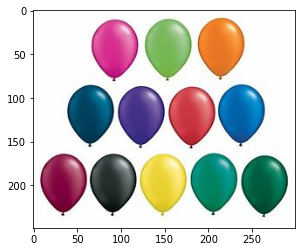

In [5]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
#Bước 1: Đọc ảnh ở chế độ ảnh màu:
path = cv2.imread('images/Thuchanh4_2.jpeg')

img_42 = cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
plt.imshow(img_42)
plt.show()



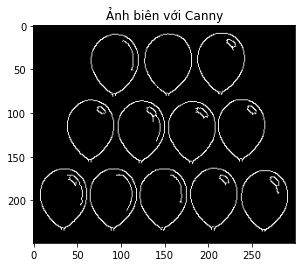

In [6]:
#Bước 2: Phát hiện biên với Canny:
#Thực hiện làm mịn ảnh với Gausian:
blur = cv2.GaussianBlur(img_42, (11,11), 0)

#Phát hiện biên với Canny
canny = cv2.Canny(blur, 30, 150, 3)

plt.imshow(canny, cmap='gray')
plt.title('Ảnh biên với Canny')
plt.show()

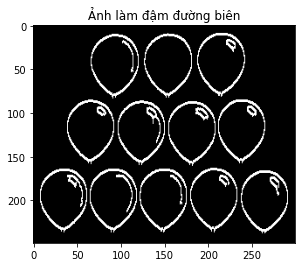

In [7]:
#Bước 3: Làm đậm đường biên:
dilated = cv2.dilate(canny, (1,1), iterations = 2)

plt.imshow(dilated, cmap='gray')
plt.title('Ảnh làm đậm đường biên')
plt.show()

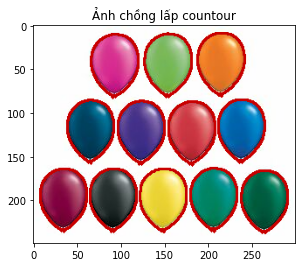

Số lượng bóng bay trong ảnh là:  12


In [22]:
#Bước 4: Lấy countour của ảnh và đếm số lượng:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img_42, cnt, -1, (200,0,0), 2)

plt.imshow(img_42)
plt.title('Ảnh chồng lấp countour')
plt.show()

print('Số lượng bóng bay trong ảnh là: ', len(cnt))

# THỰC HÀNH 4.3
---
1. Đọc và hiển thị ảnh Thuchanh4_3.jpeg ở dạng ảnh màu.
2. Sử dụng phương pháp phân vùng ảnh dựa trên kỹ thuật phân cụm Kmeans để phân ảnh ra thành:
    * 1 cụm
    * 2 cụm
    * 3 cụm
    
* Hiển thị kết quả: ảnh 1 cụm - ảnh 2 cụm - ảnh 3 cụm

<img src='images/Thuchanh4_3.jpeg' width='400px'>

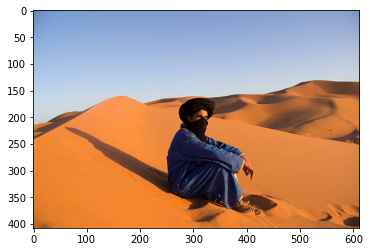

In [12]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
# Đọc ảnh màu
path_2 = cv2.imread('images/Thuchanh4_3.jpeg')

#chuyển sang hệ màu RGB
img_43 = cv2.cvtColor(path_2,cv2.COLOR_BGR2RGB)
plt.imshow(img_43)
plt.show()



In [20]:
twoDimage = img_43.reshape((-1,3))
twoDimage = np.float32(twoDimage)

#Thiết lập các tham số của cụm 1
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
K = 1
attempts=50

ret,label,center=cv2.kmeans(twoDimage,
                            K,
                            None,
                            criteria,
                            attempts,
                            cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img_43.shape))

#Thiết lập các tham số của cụm 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
K = 2
attempts=50

ret,label,center=cv2.kmeans(twoDimage,
                            K,
                            None,
                            criteria,
                            attempts,
                            cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image2 = res.reshape((img_43.shape))

#Thiết lập các tham số của cụm 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
K = 3
attempts=50
 
ret,label,center=cv2.kmeans(twoDimage,
                            K,
                            None,
                            criteria,
                            attempts,
                            cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image3 = res.reshape((img_43.shape))

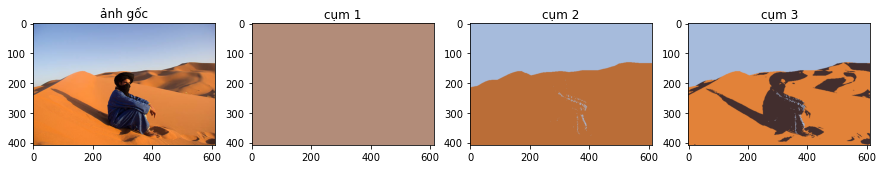

In [21]:
#Hiển thị kết quả phân cụm:

plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
img = cv2.cvtColor(img_43,cv2.COLOR_BGR2RGB)
plt.imshow(img_43)
plt.title('ảnh gốc')

plt.subplot(1, 4, 2)
plt.imshow(result_image)
plt.title('cụm 1')

plt.subplot(1, 4, 3)
plt.imshow(result_image2)
plt.title('cụm 2')

plt.subplot(1, 4, 4)
plt.imshow(result_image3)
plt.title('cụm 3')

plt.show()